<a href="https://colab.research.google.com/github/vicky1402/Spring_Info5731/blob/main/Rampelli_Vivekraj_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [30]:
# Write your code here
import numpy as np
import pandas as pd


df = pd.read_csv('/content/drive/MyDrive/5731/sentiment_analysis_results (1) (1).csv')




In [32]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Download necessary resources
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# Set up stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if isinstance(text, str):  # Check if text is a string
        tokens = word_tokenize(text.lower())
        tokens = [token for token in tokens if token.isalpha() and not token in stop_words]
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
        return tokens
    else:
        return []  # Return an empty list if text is not a string

# Assuming df is your DataFrame
df['cleaned_text'] = df['New_Name_and_Description'].apply(preprocess_text)

# Create a dictionary and corpus for LDA
dictionary = Dictionary(df['cleaned_text'])
corpus = [dictionary.doc2bow(text) for text in df['cleaned_text']]

# Creating the LDA Model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=10)

# Getting the list of words in the dictionary
features = [dictionary.get(id) for id in range(len(dictionary))]

print("Features (text representation) used for topic modeling:")
print(', '.join(features))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Features (text representation) used for topic modeling:
abe, aiko, beaverton, born, childhood, earli, farm, father, femal, influenc, kay, may, much, nisei, oregon, selleck, spent, washington, american, area, art, attend, grew, japanes, june, male, seattl, aburano, bomb, famili, groceri, ii, octob, oper, prior, sharon, store, success, tanagi, war, world, age, aiboshi, away, boyl, california, friend, height, juli, live, pa, toshiko, went, activ, aihara, angel, dougla, insur, koyasan, l, los, march, sansei, sold, torranc, august, garfield, grammar, rais, school, tacoma, yae, akagi, ann, arlen, bill, elain, fujii, karen, kim, led, lindwal, oki, panel, reiko, session, tashima, yoshitomi, evacu, follow, harbor, idaho, lindsay, move, nelson, pearl, takeo, voluntari, akashi, assembl, center, eden, merc, mount, remov, tanforan, tom, akiyama, becam, eastport, japan, spokan, travel, april, grove, hood, oak, parent, ran, river, sab, akizuki, bellevu, concentr, januari, lake, pinedal, suguro, sumi,

In [7]:
!pip install BERTopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.5/158.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 23.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 17.5 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (73

In [9]:
from bertopic import BERTopic
import pandas as pd

df['Description'] = df['New_Name_and_Description'].astype(str)

topic_model = BERTopic()
topics, _ = topic_model.fit_transform(df['Description'])
topics_info = topic_model.get_topics()

for topic_id, topic_words in topics_info.items():
    # Extract words from tuples
    top_words = [word for word, _ in topic_words[:10]]
    topic_summary = f"Cluster {topic_id} represents: {', '.join(top_words)}"
    print(topic_summary)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Cluster 0 represents: born, nisei, california, male, grew, femal, world, war, ii, washington
Cluster 1 represents: interview, tashima, bill, led, jacl, panel, elain, akemi, kuros, joy
Cluster 2 represents: redress, justic, os, identifi, movement, offic, administr, depart, establish, work


# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

For sentiment classification, selecting appropriate features is crucial for training an accurate model. In this case, the '**New_Name_and_Description**' column and the '**Sentiment_Category**' column have been chosen as the features for the classification task.

The 'New_Name_and_Description' column serves as the primary feature, containing the preprocessed textual data after undergoing cleaning and tokenization. This column encapsulates the essence of the text, providing the model with the necessary information to analyze sentiment. By including this column as a feature, the model can leverage the linguistic cues and semantic context embedded within the text to discern underlying sentiment patterns.

On the other hand, the 'Sentiment_category' column acts as the target variable or ground truth labels for sentiment. It assigns sentiment labels such as 'Positive', 'Negative', or 'Neutral' to each text sample, reflecting the overall sentiment conveyed in the text. Integrating this column as a feature allows the model to learn the associations between the textual features and their corresponding sentiment labels during the training process.

By combining the 'New_Name_and_Description' and 'Sentiment_Category' columns as features, we construct a comprehensive dataset where the textual content forms the input features, and the sentiment labels serve as the target feature for classification. This approach empowers the model to discern intricate sentiment patterns within the text data, facilitating accurate sentiment classification predictions.

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Define the selected features
selected_features = ['cleaned_text', 'Sentiment_Category']

# Select the data from the DataFrame
df_selected = df[selected_features]

# Ensure the 'cleaned_text' column is treated as string
df_selected['cleaned_text'] = df_selected['cleaned_text'].astype(str)

# Define the predictor and target variables
X = df_selected['cleaned_text']
y = df_selected['Sentiment_Category']

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Initialize the models
logreg_clf = LogisticRegression(max_iter=1000)
rf_clf = RandomForestClassifier()

# Perform 5-fold cross-validation
logreg_scores = cross_val_score(logreg_clf, X_tfidf, y, cv=5)
rf_scores = cross_val_score(rf_clf, X_tfidf, y, cv=5)

# Print the cross-validation scores
print("Logistic Regression Cross-Validation Scores:", logreg_scores)
print("Random Forest Cross-Validation Scores:", rf_scores)

# Calculate and print the mean cross-validation scores
print("Mean Logistic Regression CV Score:", logreg_scores.mean())
print("Mean Random Forest CV Score:", rf_scores.mean())


Logistic Regression Cross-Validation Scores: [0.77040816 0.78061224 0.79487179 0.77948718 0.76923077]
Random Forest Cross-Validation Scores: [0.81632653 0.81122449 0.88205128 0.86666667 0.86666667]
Mean Logistic Regression CV Score: 0.7789220303506017
Mean Random Forest CV Score: 0.8485871271585557


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the target variable
y = df_selected['Sentiment_Category']

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize classifiers
logreg_clf = LogisticRegression(max_iter=1000)
rf_clf = RandomForestClassifier()

# Train models
logreg_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# Make predictions
logreg_preds = logreg_clf.predict(X_test)
rf_preds = rf_clf.predict(X_test)

# Calculate evaluation metrics
logreg_accuracy = accuracy_score(y_test, logreg_preds)
rf_accuracy = accuracy_score(y_test, rf_preds)

logreg_precision = precision_score(y_test, logreg_preds, average='weighted')
rf_precision = precision_score(y_test, rf_preds, average='weighted')

logreg_recall = recall_score(y_test, logreg_preds, average='weighted')
rf_recall = recall_score(y_test, rf_preds, average='weighted')

logreg_f1 = f1_score(y_test, logreg_preds, average='weighted')
rf_f1 = f1_score(y_test, rf_preds, average='weighted')

# Print evaluation metrics
print("Logistic Regression Metrics:")
print("Accuracy:", logreg_accuracy)
print("Precision:", logreg_precision)
print("Recall:", logreg_recall)
print("F1 Score:", logreg_f1)

print("\nRandom Forest Metrics:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)


Logistic Regression Metrics:
Accuracy: 0.7908163265306123
Precision: 0.8091684123796625
Recall: 0.7908163265306123
F1 Score: 0.7640874334859029

Random Forest Metrics:
Accuracy: 0.8571428571428571
Precision: 0.8730005515719802
Recall: 0.8571428571428571
F1 Score: 0.8460052499260574


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [35]:
# Write your code here
hp = pd.read_csv('/content/drive/MyDrive/5731/assignment4-question3-data/train.csv')
hp_test = pd.read_csv('/content/drive/MyDrive/5731/assignment4-question3-data/test.csv')




In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

def fill_missing_values(df):
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
    df_filled = df.copy()
    for feature in numerical_features:
        if df_filled[feature].isnull().sum() > 0:
            df_filled[feature].fillna(df_filled[feature].mean(), inplace=True)
    return df_filled

def drop_irrelevant_columns(df):
    irrelevant_columns = ['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature']
    df_cleaned = df.drop(columns=irrelevant_columns, errors='ignore')  # Added 'errors' parameter to ignore errors if columns are not found
    return df_cleaned

# Assuming 'hp' and 'hp_test' are DataFrames containing housing price data

# Clean training dataset
hp_cleaned = fill_missing_values(hp)
hp_cleaned = drop_irrelevant_columns(hp_cleaned)

# Clean test dataset
hp_test_cleaned = fill_missing_values(hp_test)
hp_test_cleaned = drop_irrelevant_columns(hp_test_cleaned)


In [38]:
# Perform EDA on the 'hp' dataset
hp_cleaned.info() # Check column data types and missing values
hp_cleaned.describe() # Get summary statistics for numerical features
hp_cleaned['SalePrice'].value_counts()  # Check distribution of target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

SalePrice
140000    20
135000    17
155000    14
145000    14
190000    13
          ..
202665     1
164900     1
208300     1
181500     1
147500     1
Name: count, Length: 663, dtype: int64

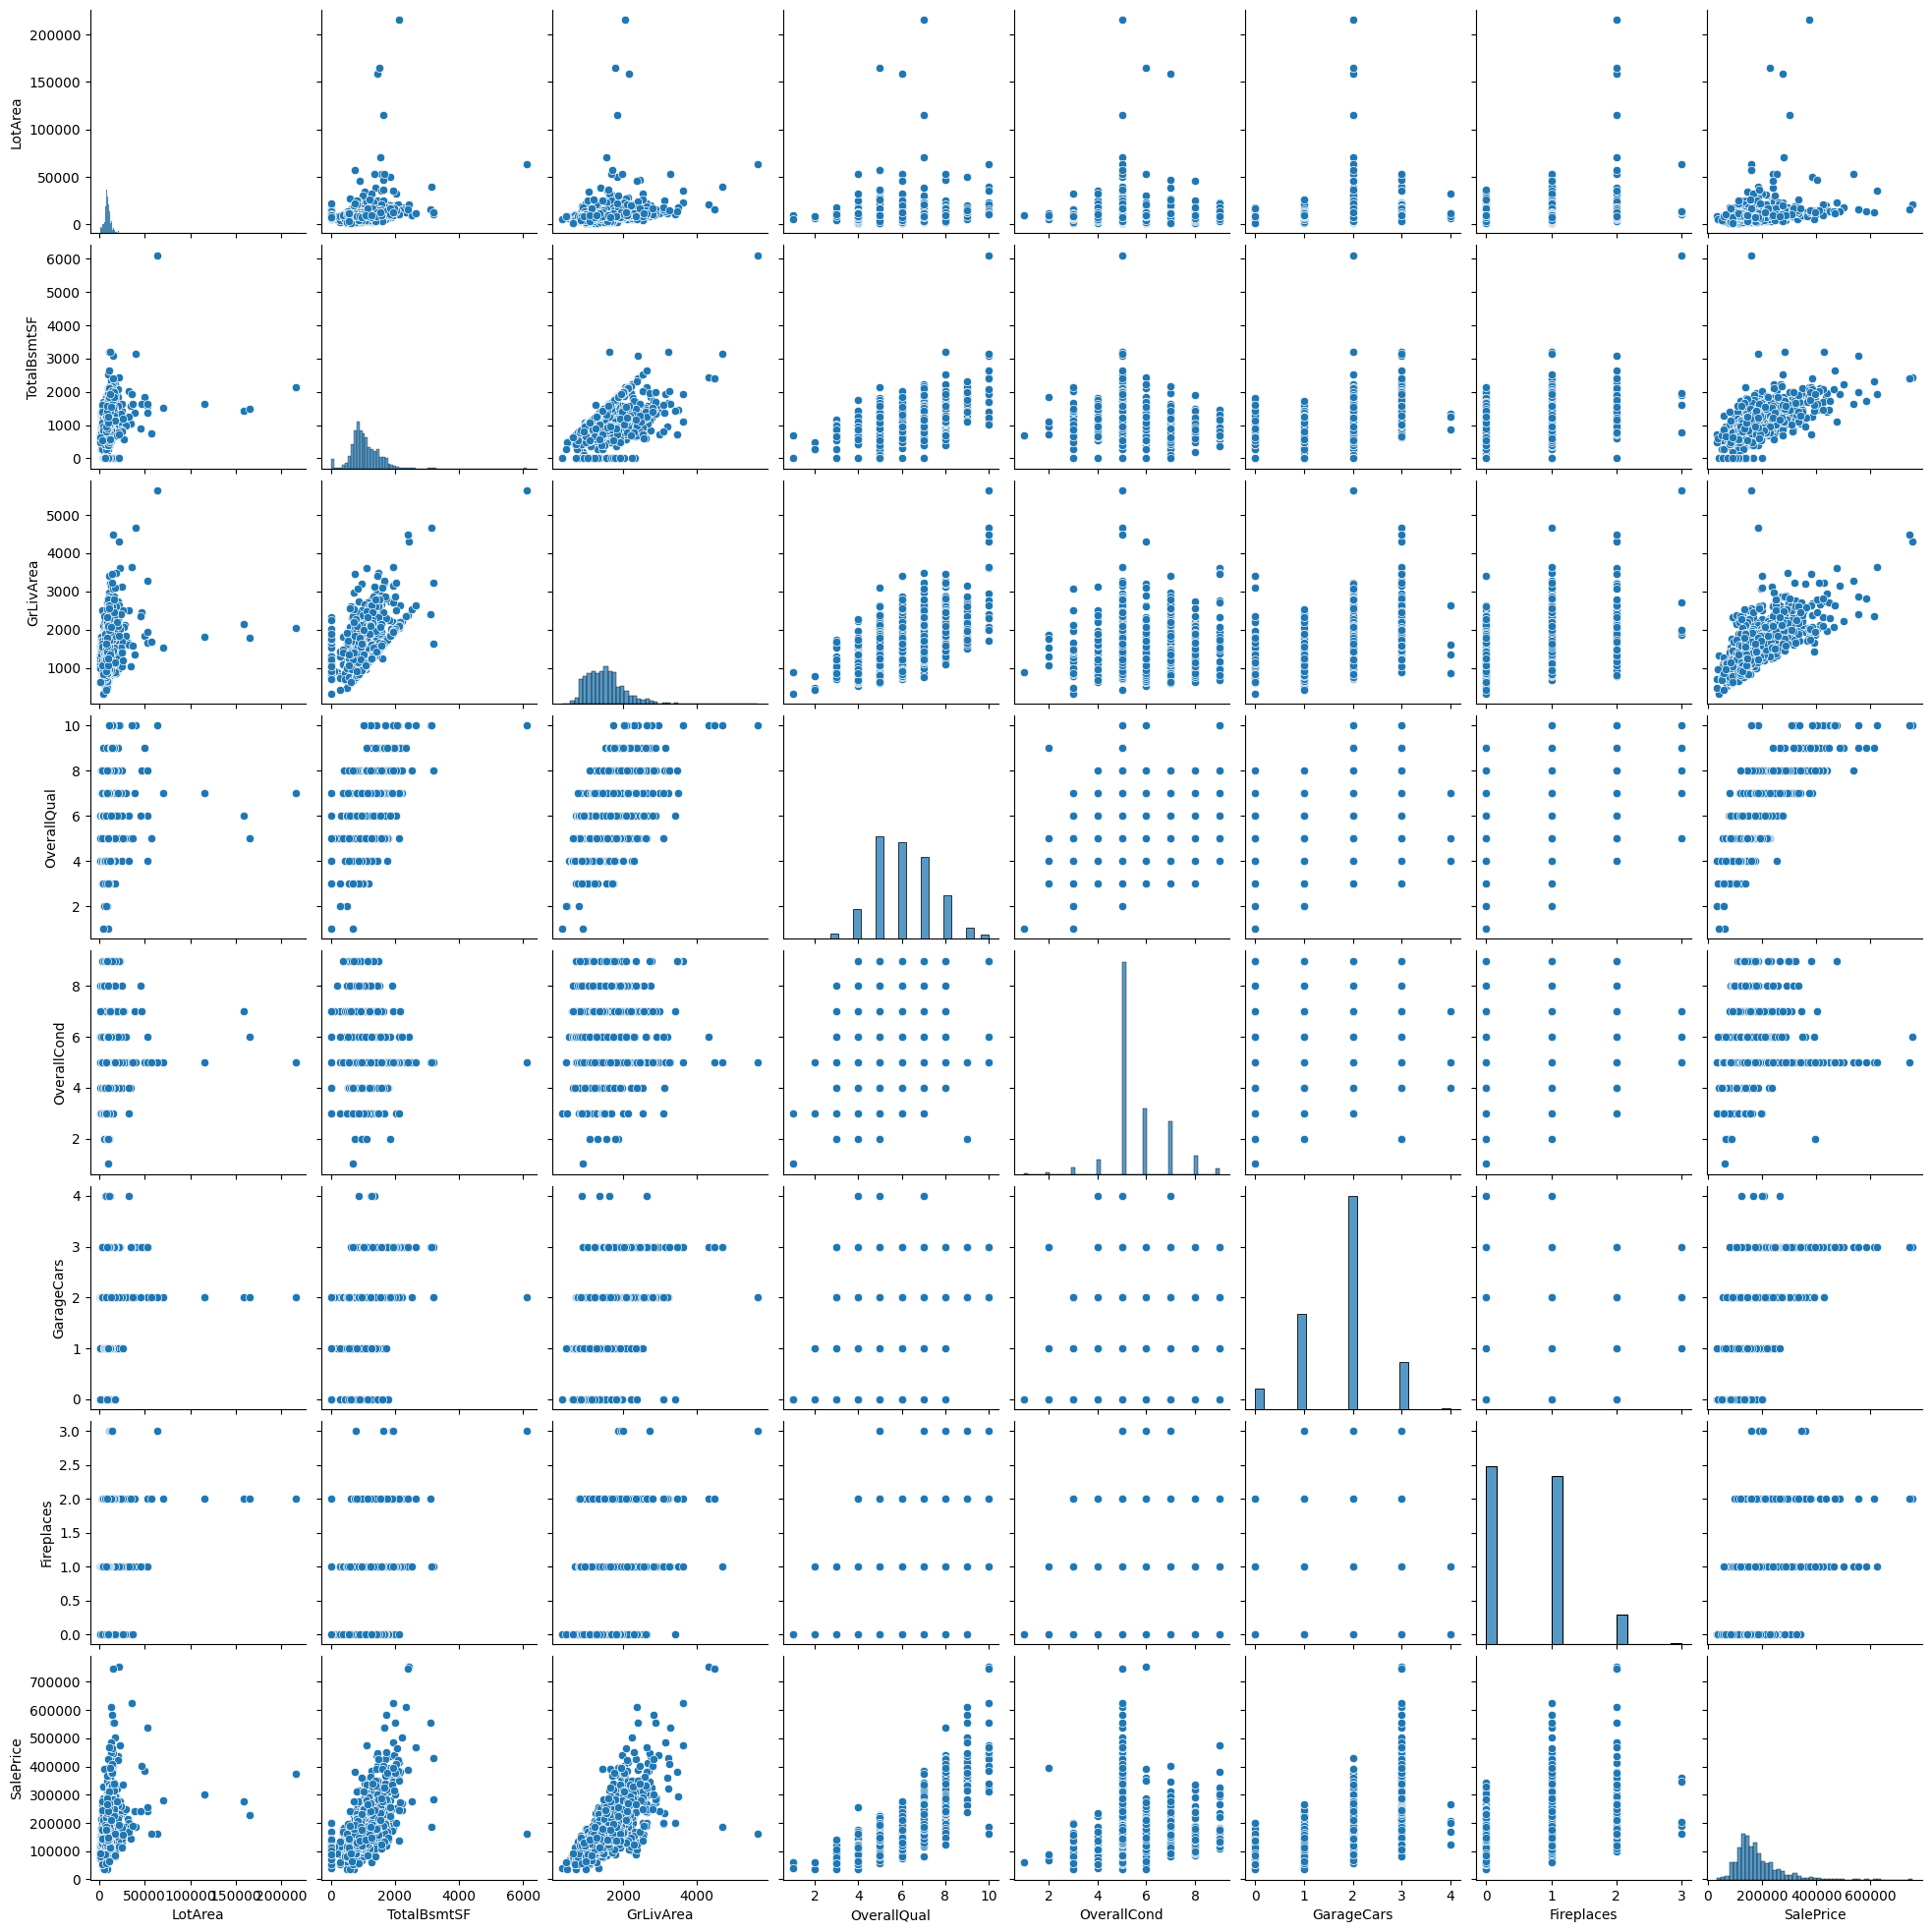

In [40]:
sns.pairplot(hp_cleaned[['LotArea', 'TotalBsmtSF', 'GrLivArea', 'OverallQual', 'OverallCond', 'GarageCars', 'Fireplaces', 'SalePrice']])
plt.show()

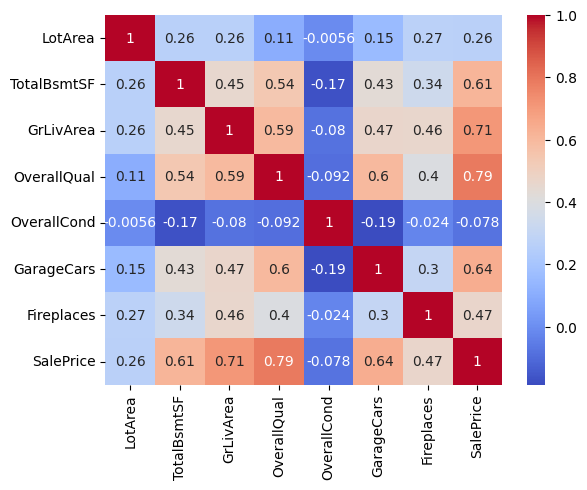

In [41]:
corr_matrix = hp_cleaned[['LotArea', 'TotalBsmtSF', 'GrLivArea', 'OverallQual', 'OverallCond', 'GarageCars', 'Fireplaces', 'SalePrice']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [43]:

def select_features(df):
    selected_features = ['LotArea', 'TotalBsmtSF', 'GrLivArea', 'OverallQual', 'OverallCond', 'GarageCars', 'Fireplaces']
    X = df[selected_features]
    y = df['SalePrice']
    return X, y
print(df.columns)
if 'SalePrice' not in hp_test_cleaned.columns:
    hp_test_cleaned['SalePrice'] = 0  # Placeholder for testing without actual SalePrice

X_train, y_train = select_features(hp_cleaned)
X_test, y_test = select_features(hp_test_cleaned)

def select_features(df):
    selected_features = ['LotArea', 'TotalBsmtSF', 'GrLivArea', 'OverallQual', 'OverallCond', 'GarageCars', 'Fireplaces']
    X = df[selected_features]
    y = df['SalePrice']
    return X, y

if 'SalePrice' not in hp_test_cleaned.columns:
    hp_test_cleaned['SalePrice'] = 0  # Placeholder for testing without actual SalePrice

X_train, y_train = select_features(hp_cleaned)
X_test, y_test = select_features(hp_test_cleaned)

Index(['Unnamed: 0', 'Name_Info', 'Noun_Count', 'Verb_Count', 'Adj_Count',
       'Adv_Count', 'New_Name_and_Description', 'Sentiment_Category',
       'cleaned_text'],
      dtype='object')


The features chosen for the regression model capture critical aspects of a property's value. Here's a concise description of each:

1. **LotArea**: Represents the land area of the property. Larger lots tend to fetch higher prices due to potential use or development.

2. **TotalBsmtSF**: Denotes the basement area. A larger basement often adds value by providing extra space.

3. **GrLivArea**: Stands for above-ground living space. Larger living areas are prized for their comfort and functionality.

4. **OverallCond**: Reflects the overall condition of the property. Well-maintained properties command higher prices.

5. **OverallQual**: Rates the overall quality of the property. Higher quality often translates to higher market value.

6. **Fireplaces**: Indicates the presence of fireplaces, adding warmth and ambiance and boosting property appeal.

7. **GarageCars**: Represents the garage capacity. Properties with larger garages for multiple cars are valued higher, especially in areas with limited parking.

These features collectively capture essential aspects of a property, helping predict its sale price accurately.


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


BERT, a pre-trained language model developed by Google, stands out for its bidirectional encoding using transformer architecture. Trained on an extensive corpus of 800 million and 2.5 billion words from Wikipedia, BERT utilizes masked language modeling (MLM), where it predicts masked tokens based on contextual cues. With 110 million parameters in its base version like "bert-base-uncased," BERT offers scalability with larger versions like "bert-large" for enhanced performance, albeit requiring more computational resources. Its versatility extends to task-specific fine-tuning, enabling adaptation to various downstream tasks like sentiment analysis, text classification, and question answering. This fine-tuning involves training the model on task-specific data with corresponding labels, ensuring the optimized utilization of pre-trained weights for targeted applications.

In [29]:
import pandas as pd
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder


df1 = df[['Description','Sentiment_Category']]
# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=3)  # Adjust num_labels to match your number of sentiment categories

# Label Encoding
label_encoder = LabelEncoder()
df1['Encoded_Sentiment_Category'] = label_encoder.fit_transform(df1['Sentiment_Category'])

# Function to tokenize and prepare input for BERT
def prepare_input(texts):
    input_ids = []
    attention_masks = []
    for text in texts:
        encoded_dict = tokenizer.encode_plus(
            text,
            add_special_tokens = True,
            max_length = 64,
            pad_to_max_length = True,
            return_attention_mask = True,
            return_tensors = 'pt',
            truncation=True  # Ensure long texts are truncated
        )
        input_ids.append(encoded_dict['input_ids'])
        attention_masks.append(encoded_dict['attention_mask'])

    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)
    return input_ids, attention_masks

# Prepare input for BERT
input_ids, attention_masks = prepare_input(df1['Description'].fillna('').tolist())

# Set model to evaluation mode
model.eval()

# Perform inference
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_masks)

# Get predicted labels
predicted_labels = torch.argmax(outputs.logits, dim=1).cpu().numpy()

# Evaluate performance
groundtruth_labels = df1['Encoded_Sentiment_Category'].tolist()

accuracy = accuracy_score(groundtruth_labels, predicted_labels)
precision = precision_score(groundtruth_labels, predicted_labels, average='weighted')
recall = recall_score(groundtruth_labels, predicted_labels, average='weighted')
f1 = f1_score(groundtruth_labels, predicted_labels, average='weighted')

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Accuracy: 0.27942681678607983
Precision: 0.4253915725711756
Recall: 0.27942681678607983
F1 Score: 0.24084893746118302


**BERT** offers several **advantages** in natural language processing (NLP). Firstly, its bidirectional context understanding, by pre-training on both left and right context, enhances its ability to comprehend the meaning of words in context. Secondly, its pre-training on a large corpus facilitates efficient transfer learning, enabling rapid development of NLP applications. Finally, BERT has demonstrated state-of-the-art performance across various NLP tasks and benchmarks, underscoring its effectiveness and versatility.

However, **BERT** also presents some **drawbacks**. Firstly, it demands substantial computational resources for both training and inference, particularly for larger models and fine-tuning on extensive datasets. Secondly, the large model size of BERT models renders them memory-intensive, posing challenges for deployment in resource-constrained environments. Lastly, despite its proficiency in capturing context, BERT still faces limitations in comprehending long-range dependencies and complex linguistic phenomena.

In addition to its advantages and disadvantages, utilizing BERT in practice poses certain challenges. One significant challenge is ensuring the correct formatting and tokenization of input data to align with BERT's requirements, especially when dealing with diverse text data formats and preprocessing needs. Furthermore, the computational demands of working with BERT, particularly concerning large text datasets, can be a hindrance, requiring access to high-performance computing resources for efficient processing.